In [1]:
import sys 
BASE_DIR="/home/asirvent/second_CTA_analysis"
sys.path.append(f"{BASE_DIR}/src/CTA-data-analisis-library/")
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re 
import glob 
import tensorflow as tf 
import seaborn as sns
import pandas as pd
import gc
import pickle 
from sklearn.metrics import confusion_matrix

#propias
import unzipdata_and_first_treatments as manipulate
import loaddata4use
import model_creation_functions as models
import model_results_representations
# %%
PATH_TXT=f"/home/asirvent/SimTelArray_2022_05"

RESULTS_DIR=f"/home/asirvent/second_CTA_analysis/notebooks/results_UGR"


2023-07-02 19:25:37.040371: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/usr/lib/python3.11/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.1 when it was built against 1.14.0, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
# %%
# voy a cargar toda la info de los txt para cada elemento 
elementos=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
aux2=[]
for i , elemento in enumerate(elementos):
    #dict_master[elemento]={}
    list_aux=glob.glob(f"{PATH_TXT}/extract_{elemento}/*.txt")
    list_aux=sorted(list_aux)

    for dir_aux in list_aux:
        run_aux=int(re.findall("(\d{3})\.txt",dir_aux)[0])
        tel_aux=int(re.findall("tel_(\d{1})_run",dir_aux)[0])
        #La idea es tener un diccionario enorme de todo lo que podemos necesitar para seleccionar el rango de todo y las distribuciones.  
        # Esto lo logramos con los datos de extract  
        array_aux=loaddata4use.extract_info_txt(dir_aux)
        if array_aux.size>0:
            aux2.append({"elemento":elemento,"run":run_aux,"tel":tel_aux,"energia":array_aux[:,2],"eventos":array_aux[:,0].astype(int)})
        else:
            aux2.append({"elemento":elemento,"run":run_aux,"tel":tel_aux,"energia":np.nan,"eventos":np.nan})
df_final=pd.DataFrame.from_dict(aux2)
df_final

,elemento,run,tel,energia,eventos
0,gamma,1,1,"[0.1087, 0.0616, 0.0904, 4.5563, 0.3297, 0.057...","[800, 1200, 1700, 2300, 3600, 4200, 4300, 5200..."
1,gamma,2,1,"[0.0957, 0.0321, 0.2691, 0.0559, 0.2708, 1.74,...","[100, 400, 700, 2100, 2500, 3100, 3300, 3500, ..."
2,gamma,3,1,NaN,NaN
3,gamma,4,1,"[0.0424, 0.1245, 0.0328, 0.0341, 1.0774, 0.070...","[100, 200, 700, 1800, 2200, 2600, 3500, 3900, ..."
4,gamma,5,1,"[0.2236, 0.2041, 0.0704, 0.1473, 0.0458, 0.095...","[200, 600, 800, 1000, 1700, 1900, 3500, 3600, ..."
...,...,...,...,...,...
9628,silicon,356,4,"[4.4503, 4.3298, 3.8065, 4.5505, 4.7329, 3.959...","[4100, 6900, 7800, 10100, 10200, 11600, 13800,..."
9629,silicon,357,4,"[3.2706, 4.7084, 4.9035, 3.0785, 3.5371, 4.756...","[400, 1200, 2100, 7400, 9300, 10700, 11700, 13..."
9630,silicon,358,4,"[4.8596, 4.8966, 2.2676, 4.0688, 4.3492, 2.959...","[700, 2700, 8300, 9000, 15400, 16300, 20500, 2..."
9631,silicon,359,4,"[2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...","[1700, 3900, 5300, 6700, 11300, 12400, 14300, ..."


In [3]:
a=df_final.groupby(["elemento","run"]).apply(lambda x: x if len(list(x["tel"]))==4 else None)
a

elemento  run  tel  \
elemento run                            
electron 1   397   electron    1    1   
             764   electron    1    2   
             1126  electron    1    3   
             1492  electron    1    4   
         2   398   electron    2    1   
...                     ...  ...  ...   
silicon  359 9631   silicon  359    4   
         360 8552   silicon  360    1   
             8912   silicon  360    2   
             9272   silicon  360    3   
             9632   silicon  360    4   

                                                             energia  \
elemento run                                                           
electron 1   397   [0.7343, 0.2967, 0.1307, 0.2604, 0.1603, 0.052...   
             764   [0.1307, 0.1603, 0.0522, 0.0365, 0.0358, 0.803...   
             1126  [0.2227, 0.1307, 0.1603, 0.1108, 0.0358, 0.803...   
             1492  [0.2227, 0.7343, 0.2967, 0.1307, 0.2604, 0.161...   
         2   398   [0.0566, 0.0508, 0.0656, 1.5473, 0.7692, 0.529...   
...                                                              ...   
silicon  359 9631  [2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...   
         360 8552  [4.6059, 3.8817, 4.4777, 2.9524, 2.7399, 4.324...   
             8912  [4.6059, 3.8379, 3.8817, 4.4777, 2.9524, 2.739...   
             9272  [4.6059, 3.8379, 3.8817, 4.4777, 2.9524, 4.626...   
             9632  [4.6059, 3.8817, 4.4777, 3.303, 3.5036, 3.8182...   

                                                             eventos  
elemento run                                                          
electron 1   397   [21200, 35900, 55300, 61000, 74000, 74800, 752...  
             764   [55300, 74000, 74800, 77500, 77700, 82500, 894...  
             1126  [800, 55300, 74000, 75200, 77700, 82500, 10600...  
             1492  [800, 21200, 35900, 55300, 61000, 62300, 74000...  
         2   398   [13900, 35800, 47100, 50700, 54300, 63600, 638...  
...                                                              ...  
silicon  359 9631  [1700, 3900, 5300, 6700, 11300, 12400, 14300, ...  
         360 8552  [1700, 4500, 4900, 5900, 6500, 7100, 7200, 760...  
             8912  [1700, 3800, 4500, 4900, 5900, 6500, 7100, 720...  
             9272  [1700, 3800, 4500, 4900, 5900, 7600, 9100, 132...  
             9632  [1700, 4500, 4900, 13200, 14800, 16100, 22200,...  

[9568 rows x 5 columns]

In [4]:
df_final

,elemento,run,tel,energia,eventos
0,gamma,1,1,"[0.1087, 0.0616, 0.0904, 4.5563, 0.3297, 0.057...","[800, 1200, 1700, 2300, 3600, 4200, 4300, 5200..."
1,gamma,2,1,"[0.0957, 0.0321, 0.2691, 0.0559, 0.2708, 1.74,...","[100, 400, 700, 2100, 2500, 3100, 3300, 3500, ..."
2,gamma,3,1,NaN,NaN
3,gamma,4,1,"[0.0424, 0.1245, 0.0328, 0.0341, 1.0774, 0.070...","[100, 200, 700, 1800, 2200, 2600, 3500, 3900, ..."
4,gamma,5,1,"[0.2236, 0.2041, 0.0704, 0.1473, 0.0458, 0.095...","[200, 600, 800, 1000, 1700, 1900, 3500, 3600, ..."
...,...,...,...,...,...
9628,silicon,356,4,"[4.4503, 4.3298, 3.8065, 4.5505, 4.7329, 3.959...","[4100, 6900, 7800, 10100, 10200, 11600, 13800,..."
9629,silicon,357,4,"[3.2706, 4.7084, 4.9035, 3.0785, 3.5371, 4.756...","[400, 1200, 2100, 7400, 9300, 10700, 11700, 13..."
9630,silicon,358,4,"[4.8596, 4.8966, 2.2676, 4.0688, 4.3492, 2.959...","[700, 2700, 8300, 9000, 15400, 16300, 20500, 2..."
9631,silicon,359,4,"[2.1081, 2.8272, 3.8519, 2.8368, 4.525, 3.0555...","[1700, 3900, 5300, 6700, 11300, 12400, 14300, ..."


In [4]:
# %%


# %%
def f_get_comon_events(df):
    all_eventos=np.concatenate(df["eventos"].to_numpy())
    event,count=np.unique(all_eventos,return_counts=True)
    all_energias=np.concatenate(df["energia"].to_numpy())
    energias_eventos_comunes=[]
    for i in event[count==4]:
        indx=np.argwhere(i==all_eventos)
        if np.unique(all_energias[indx]).size!=1:
            print("Algo ha pasado con el evento i, no coinciden las energias")
        energias_eventos_comunes.append(all_energias[indx[0]][0])
    return pd.DataFrame({"eventos":event[count==4],"energia":energias_eventos_comunes})

# %%
df_common_events=df_final.dropna().groupby(["elemento","run"]).apply(f_get_comon_events).droplevel(2).reset_index()#.to_frame()
df_common_events


,elemento,run,eventos,energia
0,electron,1,55300,0.1307
1,electron,1,74000,0.1603
2,electron,1,82500,0.8038
3,electron,1,109700,0.6685
4,electron,1,152100,0.2394
...,...,...,...,...
603177,silicon,360,1796100,4.8594
603178,silicon,360,1798300,2.8470
603179,silicon,360,1798500,4.9862
603180,silicon,360,1798800,4.4138


In [5]:

# %%
eventos_number=df_common_events.groupby(["elemento","run"]).size().to_frame().reset_index()
eventos_number=eventos_number.rename(columns={0:"n"})

# %%
#vamos a seleccionar unas runs para el train y otras para el test   
eventos_number_rand=eventos_number.groupby("elemento").apply(lambda x : x.sample(frac=1)).reset_index(drop=True)

# %%
eventos_number_rand["percent"]=eventos_number_rand.groupby("elemento")["n"].transform(lambda x : x/x.sum())

# %%
eventos_number_rand["cumsum"]=eventos_number_rand.groupby("elemento")["percent"].transform(lambda x : x.cumsum())


In [7]:
eventos_number_rand

,elemento,run,n,percent,cumsum
0,electron,146,273,0.003152,0.003152
1,electron,344,264,0.003048,0.006200
2,electron,283,237,0.002736,0.008936
3,electron,221,226,0.002609,0.011545
4,electron,197,248,0.002863,0.014408
...,...,...,...,...,...
2380,silicon,241,211,0.002448,0.988562
2381,silicon,104,220,0.002552,0.991114
2382,silicon,231,248,0.002877,0.993991
2383,silicon,138,244,0.002830,0.996822


In [6]:
runs=pd.read_csv(f"{RESULTS_DIR}/runs_train_test_3.csv",index_col=[0])
runs

,elemento,mode,list_runs
0,electron,Test,"[249, 120, 22, 293, 345, 226, 187, 102, 89, 17..."
1,electron,Train,"[144, 207, 139, 122, 154, 323, 58, 266, 221, 2..."
2,gamma,Test,"[34, 44, 78, 50, 85, 21, 65, 25, 96, 13, 66, 7..."
3,gamma,Train,"[98, 4, 48, 56, 57, 90, 68, 52, 20, 17, 12, 89..."
4,helium,Test,"[89, 27, 138, 177, 255, 158, 96, 86, 110, 142,..."
5,helium,Train,"[181, 194, 224, 131, 6, 76, 73, 212, 28, 297, ..."
6,iron,Test,"[226, 288, 367, 334, 242, 80, 104, 386, 109, 4..."
7,iron,Train,"[398, 430, 377, 56, 416, 69, 282, 353, 143, 18..."
8,nitrogen,Test,"[181, 124, 136, 263, 236, 254, 6, 153, 190, 24..."
9,nitrogen,Train,"[243, 200, 199, 31, 54, 235, 301, 398, 314, 14..."


In [7]:
import ast


In [8]:
train_electron_runs=ast.literal_eval(runs.loc[(runs["elemento"]=="electron")&(runs["mode"]=="Train"),"list_runs"].item())

In [9]:
eventos_train=[ True if ((i["elemento"]=="electron")&(i["run"] in train_electron_runs)) else False for _,i in df_final.iterrows()]

In [10]:
df_final.loc[eventos_train]

,elemento,run,tel,energia,eventos
397,electron,1,1,"[0.7343, 0.2967, 0.1307, 0.2604, 0.1603, 0.052...","[21200, 35900, 55300, 61000, 74000, 74800, 752..."
398,electron,2,1,"[0.0566, 0.0508, 0.0656, 1.5473, 0.7692, 0.529...","[13900, 35800, 47100, 50700, 54300, 63600, 638..."
403,electron,7,1,"[0.0484, 0.067, 0.1169, 2.0022, 0.4541, 0.1074...","[2100, 5000, 11400, 14900, 19300, 34900, 39100..."
404,electron,8,1,"[0.0707, 0.6065, 2.3017, 0.1881, 0.1099, 0.080...","[5300, 9000, 15800, 20700, 23000, 38400, 40600..."
405,electron,9,1,"[0.031, 0.0585, 0.0508, 0.7341, 0.4546, 4.6717...","[8100, 12300, 15500, 18600, 20800, 58200, 5860..."
...,...,...,...,...,...
1848,electron,362,4,"[1.4468, 1.1468, 2.0869, 2.8839, 4.3164, 3.184...","[2700, 2800, 3700, 6000, 7200, 9000, 10600, 11..."
1849,electron,363,4,"[2.2894, 3.9629, 2.9175, 1.9668, 2.6584, 4.822...","[700, 1400, 1700, 1900, 2800, 3800, 4000, 4800..."
1851,electron,365,4,"[1.4068, 2.8257, 2.1217, 1.1611, 2.4363, 2.411...","[2000, 5300, 5900, 7300, 8100, 9700, 10400, 12..."
1852,electron,366,4,"[3.8508, 2.5637, 2.1473, 3.1065, 4.4443, 1.969...","[3600, 3900, 4200, 6800, 10000, 10400, 10800, ..."


In [11]:
df_final.loc[eventos_train].run.unique()

array([  1,   2,   7,   8,   9,  10,  11,  12,  13,  14,  16,  17,  18,
        19,  20,  21,  23,  24,  25,  26,  28,  30,  32,  35,  36,  37,
        38,  39,  41,  42,  43,  45,  46,  47,  48,  51,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  63,  65,  66,  67,  68,  70,
        72,  73,  75,  77,  79,  80,  81,  82,  83,  86,  88,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 139, 140, 141,
       142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156,
       157, 158, 159, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       173, 174, 175, 178, 179, 180, 181, 182, 183, 184, 185, 189, 190,
       191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 213, 215, 217, 219, 220, 221, 222,
       223, 224, 225, 228, 230, 231, 232, 233, 234, 235, 236, 23

In [12]:
np.all(np.array(sorted(ast.literal_eval(runs.iloc[1]["list_runs"])))==df_final.loc[eventos_train].run.unique())

True

In [13]:
with open(f"{RESULTS_DIR}/hist_3.pickle","rb") as pick:
    hist= pickle.load(pick)

In [96]:
hist.keys()

dict_keys(['loss', 'acc', 'auc', 'mean_squared_error', 'val_loss', 'val_acc', 'val_auc', 'val_mean_squared_error'])

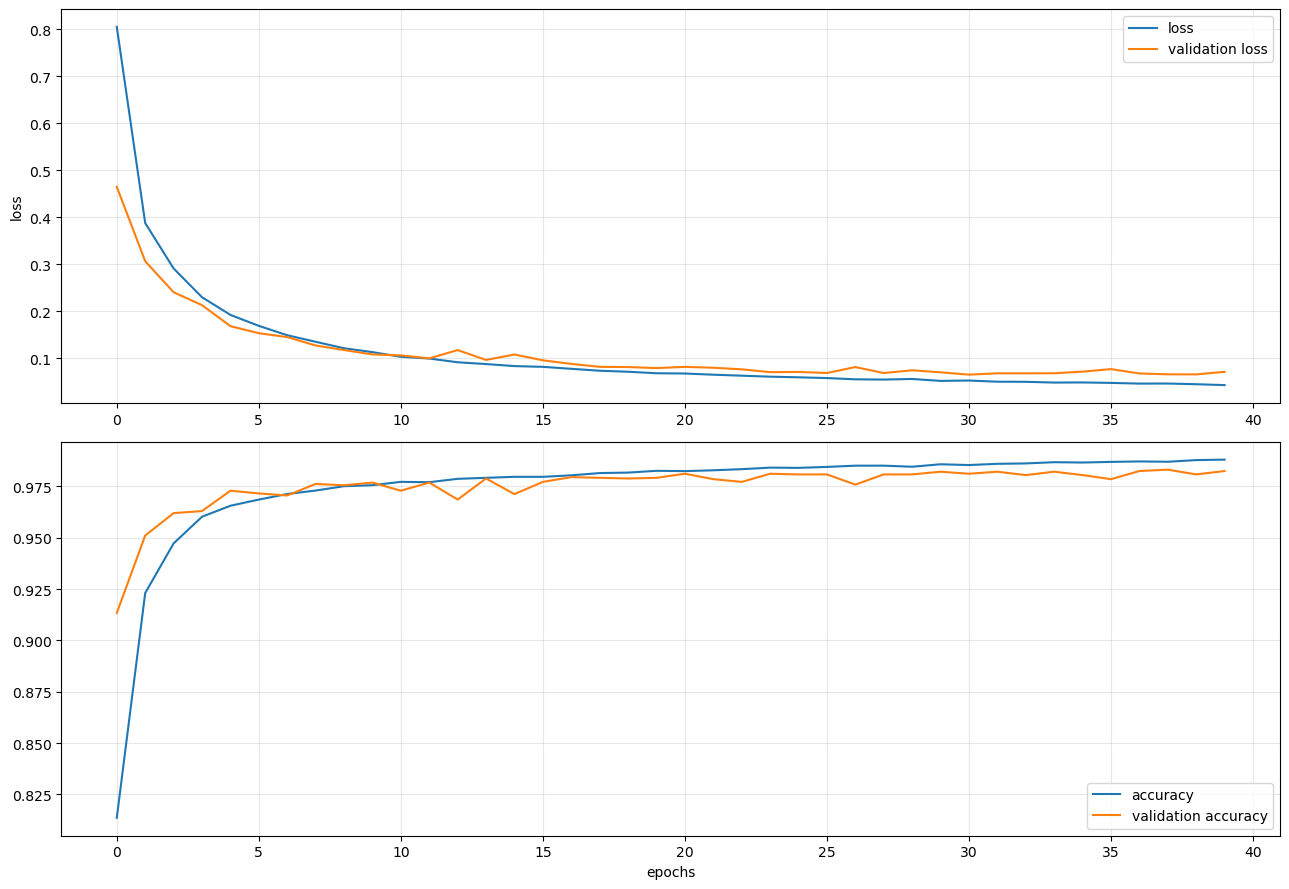

In [37]:
fig = plt.figure(figsize=(13,9))
ax=plt.subplot(2,1,1)
plt.plot(hist["loss"],label="loss")
plt.plot(hist["val_loss"],label="validation loss")
plt.legend()
plt.ylabel("loss")
plt.grid(alpha=0.3)
plt.subplot(2,1,2,sharex=ax)
plt.plot(hist["acc"],label="accuracy")
plt.plot(hist["val_acc"],label="validation accuracy")
plt.ylabel("")
plt.xlabel("epochs")

plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()

In [28]:
modelo=tf.keras.models.load_model(f"{RESULTS_DIR}/test_3.h5")

2023-07-02 19:31:38.730362: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9648 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1a:00.0, compute capability: 7.5
2023-07-02 19:31:38.732139: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9648 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1b:00.0, compute capability: 7.5
2023-07-02 19:31:38.733356: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9648 MB memory:  -> device: 2, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:1c:00.0, compute capability: 7.5
2023-07-02 19:31:38.734920: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 9648 MB memory:  -> device: 3, name: NVIDIA GeForce RTX

In [50]:
runs.set_index(["elemento","mode"])["list_runs"].apply(len)

elemento  mode 
electron  Test      315
          Train    1313
gamma     Test       81
          Train     293
helium    Test      299
          Train    1193
iron      Test      414
          Train    1648
nitrogen  Test      382
          Train    1510
proton    Test      408
          Train    1634
silicon   Test      344
          Train    1348
Name: list_runs, dtype: int64

In [51]:
test_electron_runs=ast.literal_eval(runs.loc[runs["mode"]=="Test","list_runs"].item())

ValueError: can only convert an array of size 1 to a Python scalar

In [52]:
runs_aux1=runs.loc[runs["mode"]=="Test",["elemento","list_runs"]]
runs_aux1["list_runs"]=runs_aux1["list_runs"].apply(lambda x : ast.literal_eval(x))

In [53]:
runs_aux1

,elemento,list_runs
0,electron,"[249, 120, 22, 293, 345, 226, 187, 102, 89, 17..."
2,gamma,"[34, 44, 78, 50, 85, 21, 65, 25, 96, 13, 66, 7..."
4,helium,"[89, 27, 138, 177, 255, 158, 96, 86, 110, 142,..."
6,iron,"[226, 288, 367, 334, 242, 80, 104, 386, 109, 4..."
8,nitrogen,"[181, 124, 136, 263, 236, 254, 6, 153, 190, 24..."
10,proton,"[336, 235, 404, 405, 213, 36, 247, 287, 199, 2..."
12,silicon,"[294, 116, 31, 291, 257, 289, 260, 75, 316, 32..."


In [33]:
list(runs_aux1.list_runs)


[[367,
  297,
  339,
  313,
  41,
  326,
  181,
  345,
  260,
  102,
  118,
  184,
  180,
  25,
  99,
  1,
  165,
  97,
  365,
  323,
  290,
  2,
  120,
  98,
  3,
  189,
  198,
  362,
  112,
  156,
  86,
  239,
  59,
  212,
  155,
  58,
  368,
  148,
  306,
  350,
  256,
  56,
  93,
  38,
  219,
  34,
  50,
  47,
  125,
  266,
  255,
  361,
  360,
  24,
  217,
  37,
  84,
  117,
  335,
  100,
  223,
  71,
  11,
  106,
  262,
  138,
  35,
  278],
 [52, 77, 8, 19, 99, 92, 45, 81, 70, 15, 58, 87, 95, 11, 29, 60, 20, 84],
 [158,
  90,
  123,
  244,
  164,
  112,
  34,
  98,
  61,
  72,
  152,
  47,
  22,
  40,
  89,
  87,
  183,
  1,
  204,
  82,
  83,
  206,
  314,
  235,
  26,
  277,
  170,
  221,
  131,
  88,
  308,
  68,
  269,
  78,
  154,
  278,
  147,
  127,
  274,
  148,
  60,
  275,
  213,
  132,
  191,
  94,
  212,
  20,
  11,
  230,
  135,
  107,
  252,
  105,
  21,
  195,
  38,
  155,
  37,
  140,
  144,
  153,
  67,
  194,
  266,
  113],
 [332,
  250,
  374,
  381,
  208,
  3

In [54]:
def cambiar_ejes_lista(lista):
    for i,j in enumerate(lista):
        lista[i]=np.swapaxes(j,1,2)
    return lista

In [55]:
mapping_labels={ j : i if i<=2 else 2 for i,j in enumerate(elementos)}
labels_mapped=[mapping_labels[i] for i in list(runs_aux1.elemento) ]

In [46]:
#list(map(mapping_labels.get, list(runs_aux1.elemento)))


[1, 0, 2, 2, 2, 2, 2]

In [56]:
PATH_NPY=f"{BASE_DIR}/data_full/elementos_npy"
x_train_list,x_test_list,y_train_list,y_test_list=loaddata4use.load_dataset_completo(PATH_NPY,list(runs_aux1.list_runs),[1,2,3,4],labels_asign=labels_mapped,elements=list(runs_aux1.elemento),pre_name_folders="npy_",test_size=0.01,same_quant="all",verbose=True,fill=True,categorical=True)

Load of names and common events
_______________
0 ;  Element:  electron  , Runs:  [249, 120, 22, 293, 345, 226, 187, 102, 89, 176, 33, 246, 15, 40, 193, 350, 310, 216, 71, 316, 172, 177, 349, 161, 369, 262, 360, 328, 367, 31, 6, 315, 339, 186, 329, 5, 69, 265, 84, 336, 74, 137, 338, 313, 4, 34, 370, 309, 76, 188, 214, 64, 364, 49, 113, 3, 212, 327, 50, 227, 52, 153, 160, 242, 250, 101, 229, 27]  Shape of common events (tels,common events):  (4, 274)
1 ;  Element:  electron  , Runs:  [249, 120, 22, 293, 345, 226, 187, 102, 89, 176, 33, 246, 15, 40, 193, 350, 310, 216, 71, 316, 172, 177, 349, 161, 369, 262, 360, 328, 367, 31, 6, 315, 339, 186, 329, 5, 69, 265, 84, 336, 74, 137, 338, 313, 4, 34, 370, 309, 76, 188, 214, 64, 364, 49, 113, 3, 212, 327, 50, 227, 52, 153, 160, 242, 250, 101, 229, 27]  Shape of common events (tels,common events):  (4, 232)
2 ;  Element:  electron  , Runs:  [249, 120, 22, 293, 345, 226, 187, 102, 89, 176, 33, 246, 15, 40, 193, 350, 310, 216, 71, 316, 172, 177, 3

KeyboardInterrupt: 

In [48]:

x_train_list=cambiar_ejes_lista(x_train_list)

x_test_list=cambiar_ejes_lista(x_test_list)

In [49]:
y_pred=modelo.predict(x_train_list)

2023-06-29 18:59:12.573611: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8800
2023-06-29 18:59:16.654445: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 64.73MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-29 18:59:16.660145: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 146.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-29 18:59:16.660215: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 146.00MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains

3758/3764 [============================>.] - ETA: 0s

2023-06-29 18:59:53.128671: W tensorflow/core/kernels/conv_ops_gpu.cc:143] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 18
in_depths: 32
out_depths: 64
in: 55
in: 93
data_format: 1
filter: 3
filter: 3
filter: 32
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 1
padding: 1
dtype: DT_FLOAT
group_count: 1
device_identifier: "sm_7.5 with 11546394624B RAM, 68 cores, 1545000KHz clock, 7000000KHz mem clock, 5767168B L2$"
fusion {
  activation_mode: kRelu
  conv_scale: 1
}
version: 3

2023-06-29 18:59:53.189440: W tensorflow/core/kernels/conv_ops_gpu.cc:143] None of the algorithms provided by cuDNN frontend heuristics worked; trying fallback algorithms.  Conv: batch: 18
in_depths: 64
out_depths: 128
in: 27
in: 46
data_format: 1
filter: 3
filter: 3
filter: 64
dilation: 1
dilation: 1
stride: 1
stride: 1
padding: 1
padding: 1
dtype: DT_FLOAT
group_count: 1
device_identifier: "sm_7.5 with 11546394624B RAM, 68 cores, 1545000KHz 

3764/3764 [==============================] - 47s 10ms/step


In [50]:
np.unique(np.argmax(y_pred,axis=1),return_counts=True)

(array([0, 1, 2]), array([23514, 17728, 79192]))

y ESTO LO HACEMOS PARA TODOS 


In [51]:
y_pred

array([[1.1908049e-06, 5.0129215e-06, 9.9999380e-01],
       [1.2305756e-10, 3.1303310e-10, 1.0000000e+00],
       [9.9999630e-01, 3.6769475e-06, 4.0876594e-11],
       ...,
       [9.5074473e-37, 8.9189206e-38, 1.0000000e+00],
       [4.7838711e-03, 9.7845662e-01, 1.6759424e-02],
       [1.5930539e-09, 9.9950731e-01, 4.9265521e-04]], dtype=float32)

In [52]:
y_train_list

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [109]:
#funcion que nos ayuda a mostar la matrix de confusion, needs seaborn as sns
def print_conf_matrix(matrix,elements=None,sin_diag=True,save_dir=None):
    if elements is None:
        elements=['gamma', 'electron', 'proton', 'helium', 'iron', 'nitrogen', 'silicon']
    if sin_diag:
        for i in range(len(elements)):
            matrix[i,i]=0
    fig=plt.figure(figsize=(10,7))
    sns.heatmap(matrix,annot=True,annot_kws={'size':16},fmt=".3g")

    plt.yticks(np.arange(len(elements))+0.5,elements,fontsize=14,rotation=0);
    plt.xticks(np.arange(len(elements))+0.5,elements,fontsize=14,rotation=0);
    plt.title("True label in Y-axis, predicted label in X-axis", fontsize=15)
    if save_dir != None:
        plt.tight_layout()
        plt.savefig(save_dir)
    return fig


def comp_and_diplay_conf_matrix(y_test,y_predict,elements=None,sin_diag=True,norm="true",save_dir=None):
    matrix=confusion_matrix(np.argmax(y_test,axis=-1),np.argmax(y_predict,axis=-1),normalize=norm) #sklearn.metrics.confusion_matrix
    return print_conf_matrix(matrix,elements=elements,sin_diag=sin_diag,save_dir=save_dir)



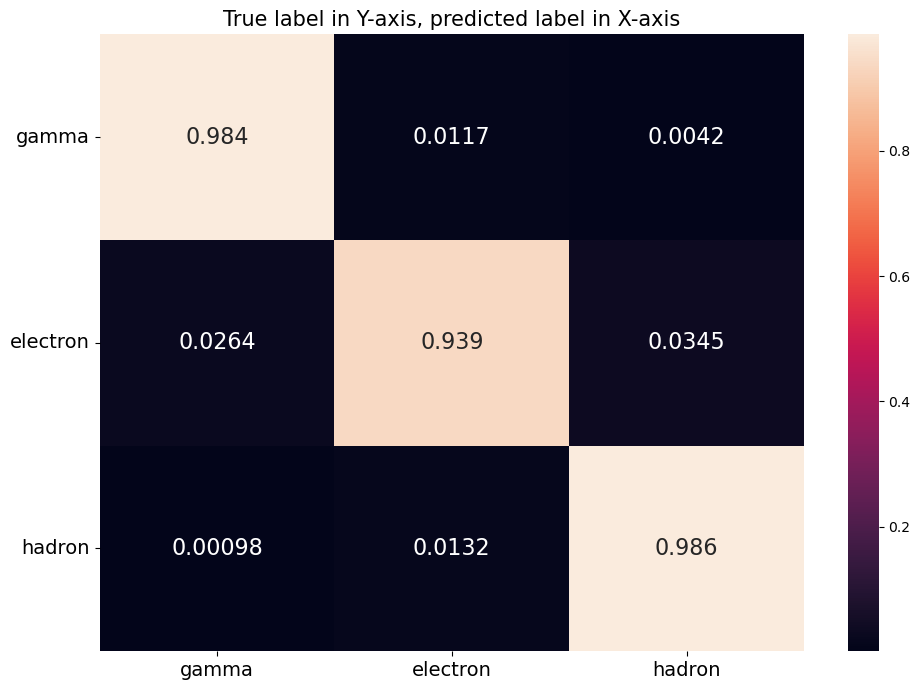

In [110]:
comp_and_diplay_conf_matrix(y_train_list,y_pred,elements=["gamma","electron","hadron"],sin_diag=False,save_dir=f"{RESULTS_DIR}/conf_matrix_1.png");

In [211]:
#vamos a investigar más sobre los datos con los que se entrenó este modelo y sobres los que se ha validado
runs_aux1=runs.loc[runs["mode"]=="Train",["elemento","list_runs"]]
runs_aux1["list_runs"]=runs_aux1["list_runs"].apply(lambda x : ast.literal_eval(x))

In [212]:
runs_aux1["list_runs"]=[i[-80:] for i in runs_aux1["list_runs"]]
runs_aux1

,elemento,list_runs
1,electron,"[203, 351, 57, 287, 329, 173, 177, 10, 369, 45..."
3,gamma,"[51, 57, 97, 86, 62, 67, 69, 24, 65, 78, 26, 6..."
5,helium,"[18, 145, 289, 313, 16, 139, 130, 119, 8, 36, ..."
7,iron,"[271, 389, 76, 173, 314, 390, 57, 265, 113, 78..."
9,nitrogen,"[173, 387, 10, 109, 209, 373, 18, 296, 19, 399..."
11,proton,"[48, 244, 249, 427, 100, 49, 70, 279, 248, 4, ..."
13,silicon,"[261, 110, 267, 86, 12, 243, 324, 222, 102, 16..."


In [213]:
energias_per_run=df_common_events.groupby(["elemento","run"]).agg(list).drop(columns="eventos")
energias_per_run

energia
elemento run                                                   
electron 1    [0.1307, 0.1603, 0.8038, 0.6685, 0.2394, 0.107...
         2    [1.5473, 0.3698, 0.1355, 0.9396, 0.1923, 0.121...
         3    [0.139, 0.0418, 0.0467, 1.0707, 0.2228, 0.1403...
         4    [0.0428, 0.1456, 0.7546, 0.3661, 0.0518, 0.186...
         5    [0.104, 3.3916, 0.3936, 0.3255, 0.3975, 0.1012...
...                                                         ...
silicon  356  [3.9591, 3.7867, 1.834, 3.518, 4.0968, 4.4764,...
         357  [3.2706, 4.7084, 4.9035, 4.7564, 3.7835, 2.622...
         358  [4.8596, 4.8966, 2.9599, 4.9395, 2.7414, 4.094...
         359  [3.8519, 2.8368, 4.525, 3.0555, 4.0855, 4.0747...
         360  [4.6059, 3.8817, 4.4777, 3.5036, 2.341, 3.0815...

[2385 rows x 1 columns]

In [214]:
multi_indices=runs_aux1.explode("list_runs").to_numpy()
multi_indices=[tuple(i) for i in multi_indices]
multi_indices

[('electron', 203),
 ('electron', 351),
 ('electron', 57),
 ('electron', 287),
 ('electron', 329),
 ('electron', 173),
 ('electron', 177),
 ('electron', 10),
 ('electron', 369),
 ('electron', 45),
 ('electron', 6),
 ('electron', 283),
 ('electron', 187),
 ('electron', 116),
 ('electron', 80),
 ('electron', 347),
 ('electron', 39),
 ('electron', 23),
 ('electron', 4),
 ('electron', 277),
 ('electron', 274),
 ('electron', 52),
 ('electron', 258),
 ('electron', 46),
 ('electron', 179),
 ('electron', 224),
 ('electron', 359),
 ('electron', 337),
 ('electron', 234),
 ('electron', 204),
 ('electron', 142),
 ('electron', 190),
 ('electron', 263),
 ('electron', 76),
 ('electron', 62),
 ('electron', 113),
 ('electron', 302),
 ('electron', 103),
 ('electron', 8),
 ('electron', 299),
 ('electron', 207),
 ('electron', 296),
 ('electron', 199),
 ('electron', 72),
 ('electron', 221),
 ('electron', 182),
 ('electron', 264),
 ('electron', 246),
 ('electron', 279),
 ('electron', 70),
 ('electron', 174)

In [215]:
energias_train=energias_per_run.loc[multi_indices]
energias_train=energias_train.groupby("elemento")["energia"].agg(np.concatenate)
energias_train

elemento
electron    [0.259, 2.1538, 0.2099, 0.9836, 0.0663, 2.6189...
gamma       [0.2399, 0.134, 4.7865, 0.0531, 2.8117, 0.3585...
helium      [0.3698, 0.2604, 0.6493, 1.2103, 3.1005, 3.033...
iron        [4.2958, 3.1933, 4.3355, 4.0511, 3.7175, 4.805...
nitrogen    [4.4164, 1.5352, 2.2004, 4.0234, 1.9106, 3.314...
proton      [2.7868, 0.4237, 2.9206, 0.5756, 3.0464, 0.380...
silicon     [4.0522, 4.085, 2.6431, 1.1385, 2.9559, 3.1685...
Name: energia, dtype: object

In [216]:
energias_train.apply(len)

elemento
electron    19587
gamma       93621
helium      20875
iron        12613
nitrogen    17834
proton      13766
silicon     19035
Name: energia, dtype: int64

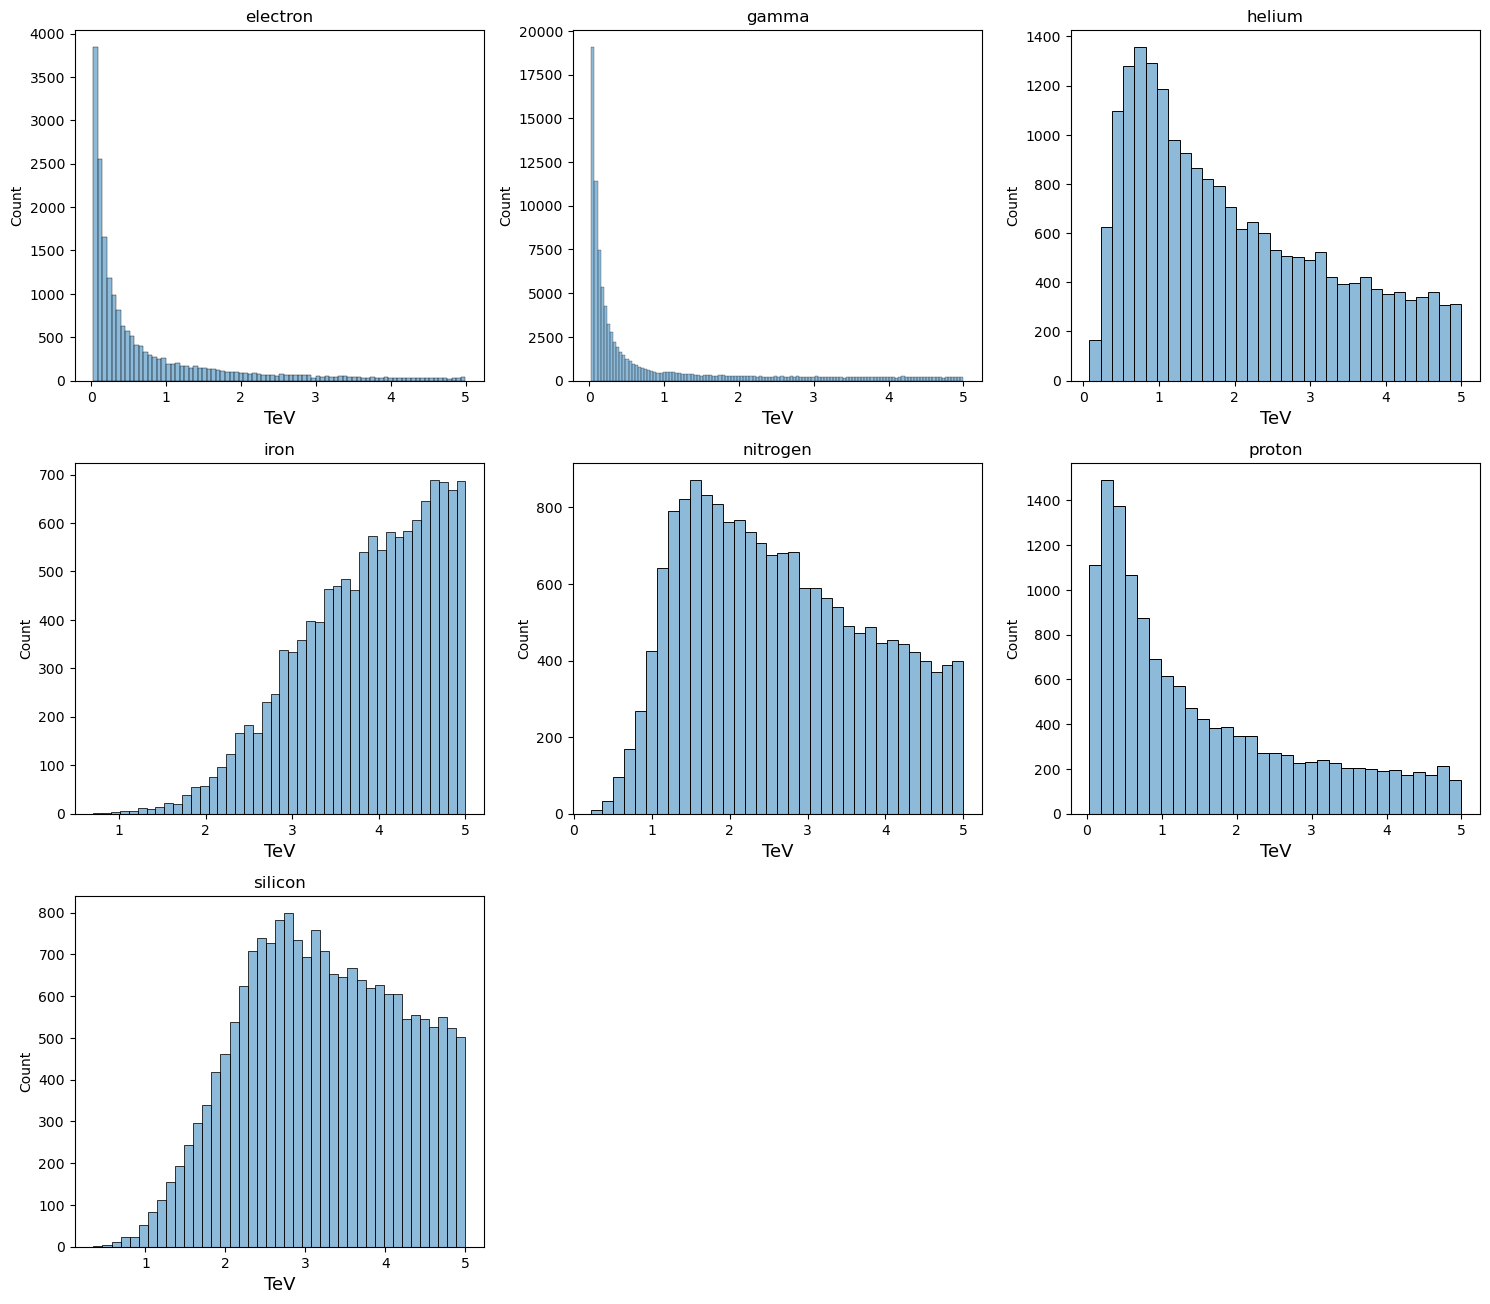

In [217]:
plt.figure(figsize=(15,17))

for k,(i,j) in enumerate(energias_train.items()):
    plt.subplot(4,3,k+1)
    sns.histplot({i:j},legend=False)
    plt.title(i)
    plt.xlabel("TeV",fontsize=13)
    
plt.tight_layout()

Y para test

In [218]:
#vamos a investigar más sobre los datos con los que se entrenó este modelo y sobres los que se ha validado
runs_aux1=runs.loc[runs["mode"]=="Test",["elemento","list_runs"]]
runs_aux1["list_runs"]=runs_aux1["list_runs"].apply(lambda x : ast.literal_eval(x))
runs_aux1["list_runs"]=[i[-80:] for i in runs_aux1["list_runs"]]
energias_per_run=df_common_events.groupby(["elemento","run"]).agg(list).drop(columns="eventos")
multi_indices=runs_aux1.explode("list_runs").to_numpy()
multi_indices=[tuple(i) for i in multi_indices]
energias_test=energias_per_run.loc[multi_indices]
energias_test=energias_test.groupby("elemento")["energia"].agg(np.concatenate)

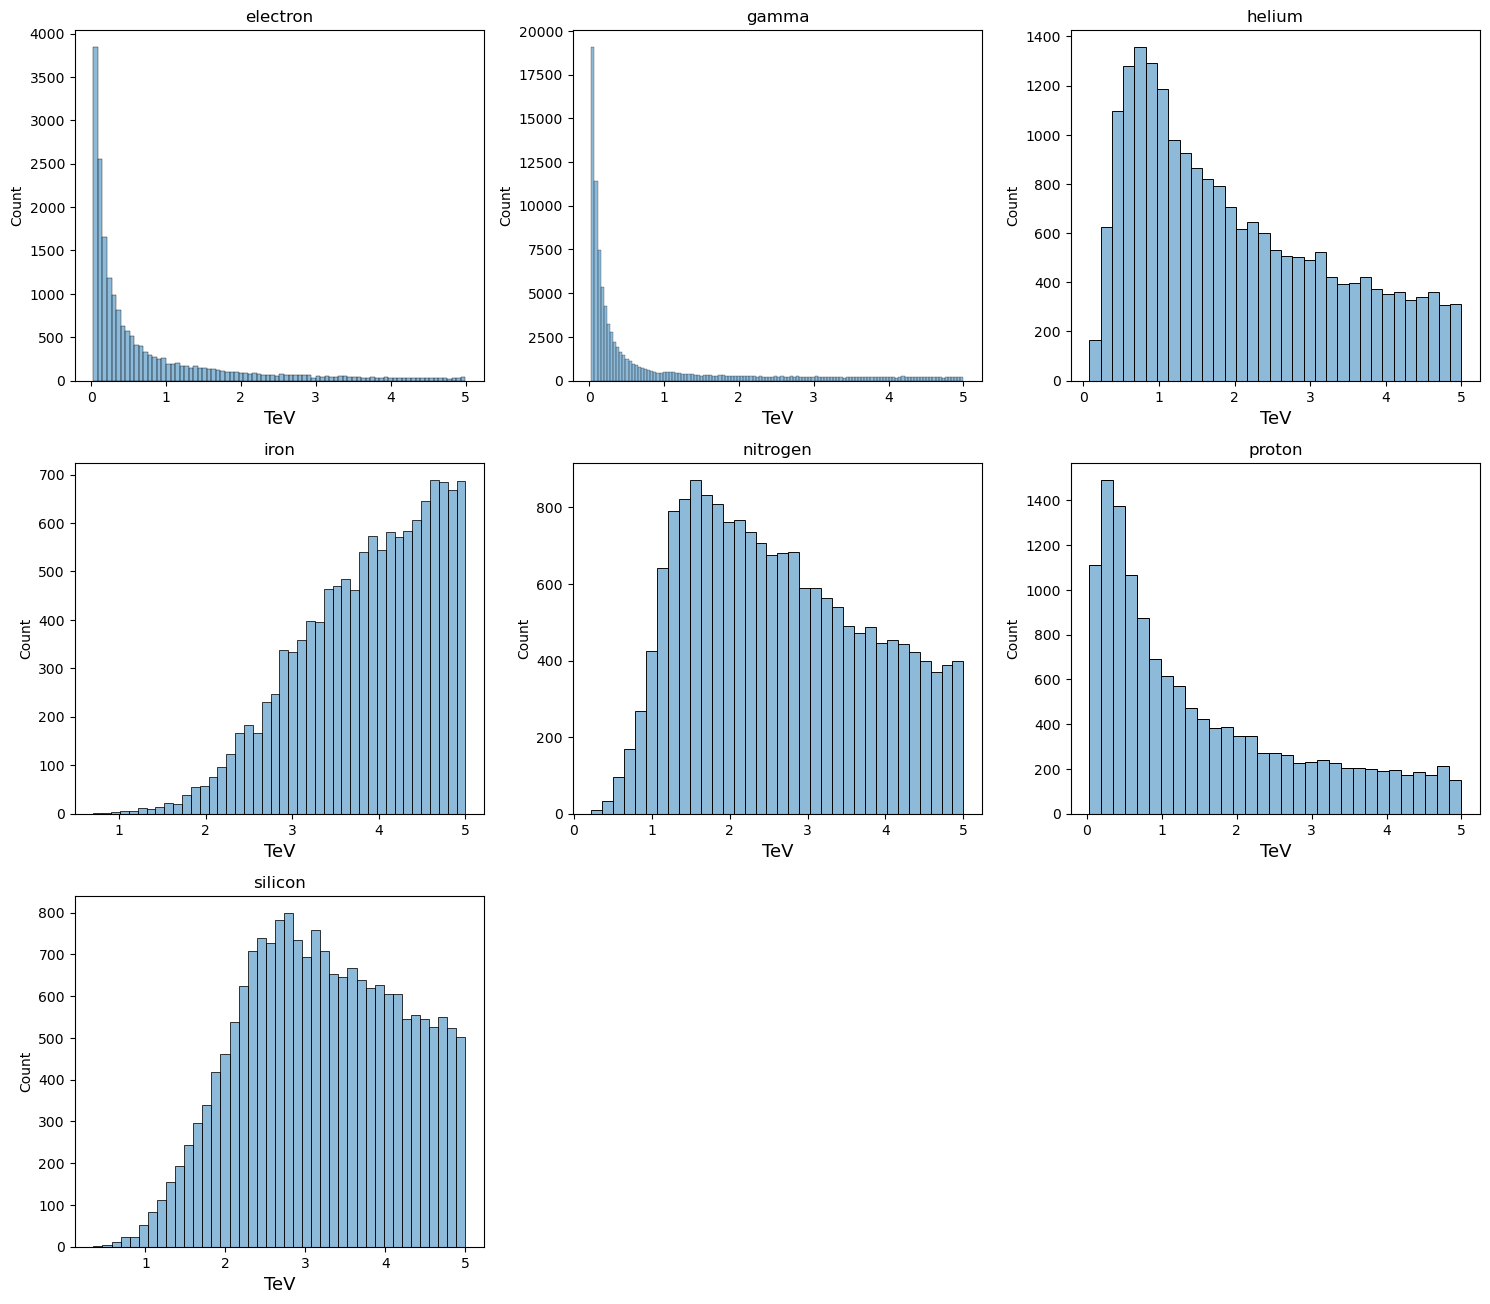

In [219]:
plt.figure(figsize=(15,17))

for k,(i,j) in enumerate(energias_train.items()):
    plt.subplot(4,3,k+1)
    sns.histplot({i:j},legend=False)
    plt.title(i)
    plt.xlabel("TeV",fontsize=13)
    
plt.tight_layout()

In [220]:
energias_train.index.values

array(['electron', 'gamma', 'helium', 'iron', 'nitrogen', 'proton',
       'silicon'], dtype=object)

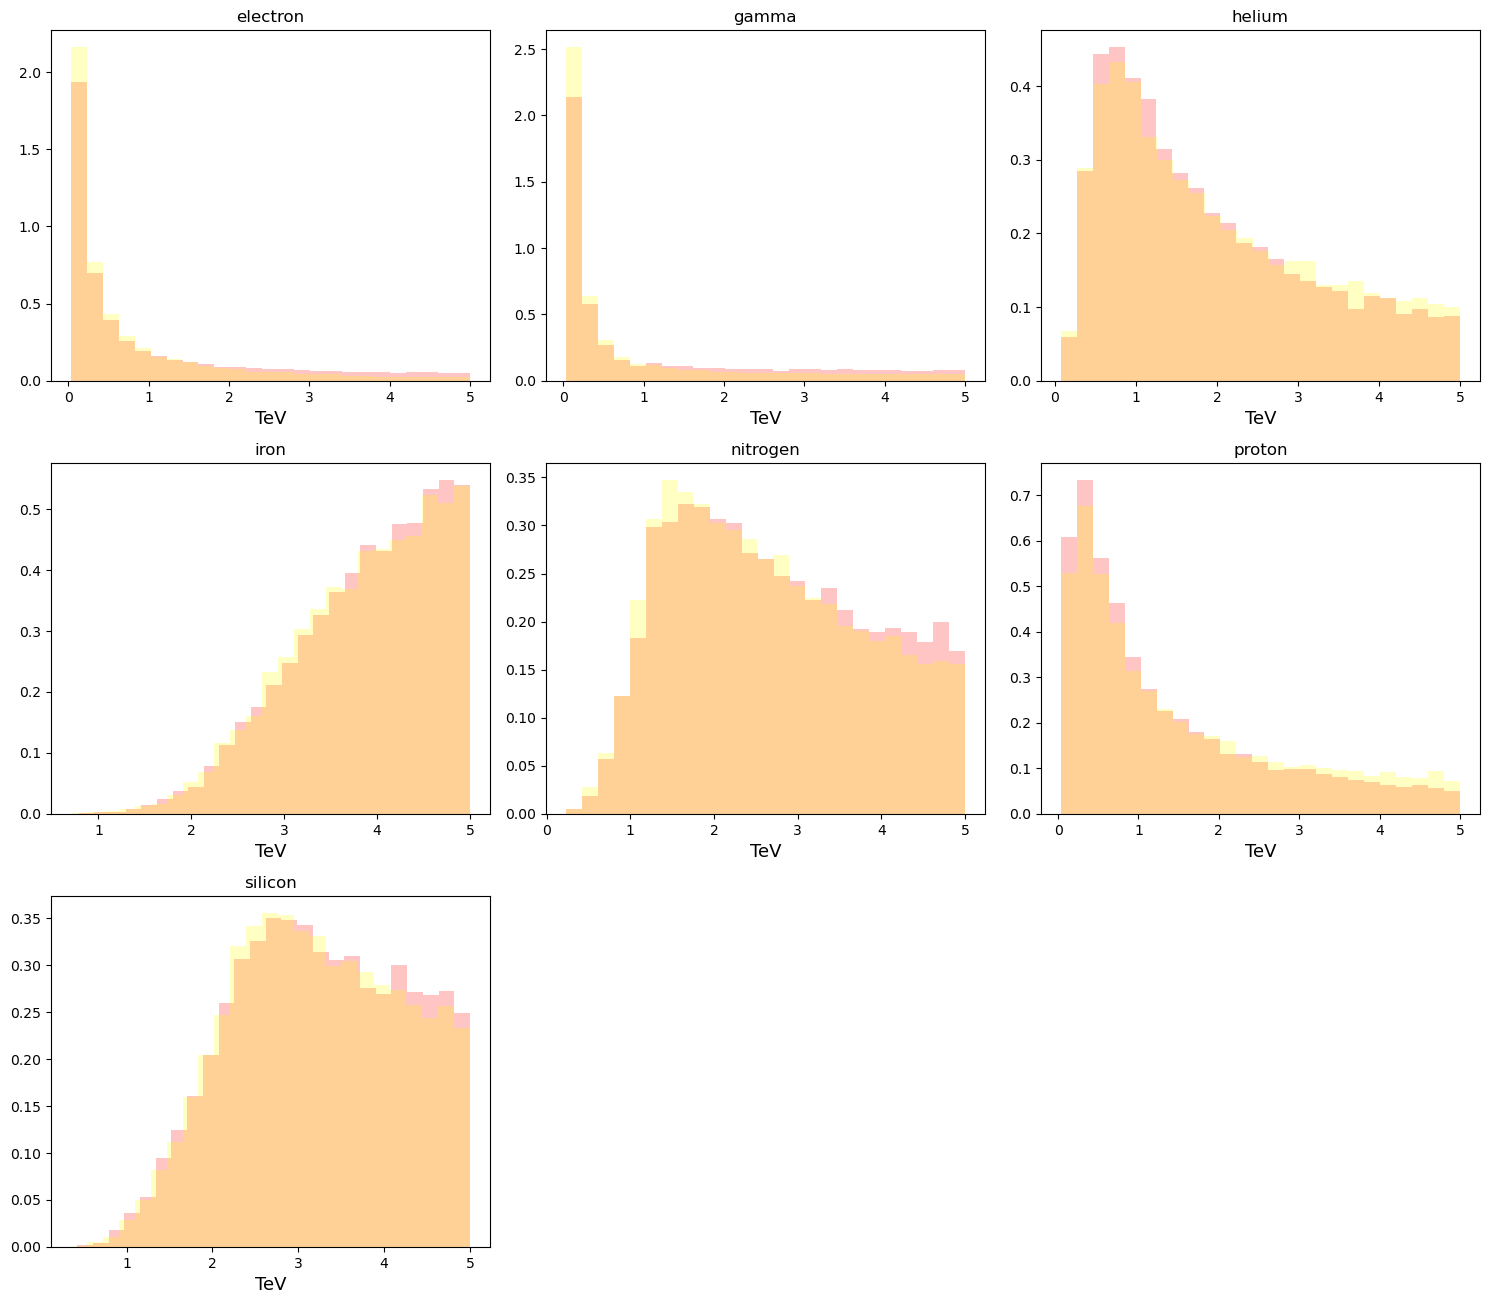

In [227]:
plt.figure(figsize=(15,17))

for i,elem in enumerate(energias_train.index.values):
    plt.subplot(4,3,i+1)
    plt.hist(energias_test[elem],alpha=0.23,bins=25,color="red",density=True)
    plt.hist(energias_train[elem],alpha=0.23,bins=25,color="yellow",density=True)
    plt.title(elem)
    plt.xlabel("TeV",fontsize=13)
    
plt.tight_layout()